## Import

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf

## Read dataset

In [53]:
dataset = pd.read_csv('datasets/DailyDelhiClimateTrain.csv')
dataset

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


## Count of duplicate and NaN values

In [54]:
dup = dataset.duplicated().sum()
print('Any Duplicate Value:',dup)
dataset.isnull().sum()

Any Duplicate Value: 0


date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [55]:
df_test = pd.read_csv('datasets/DailyDelhiClimateTrain.csv')

In [56]:

row = df_test["wind_speed"]
training_time_steps = 1000

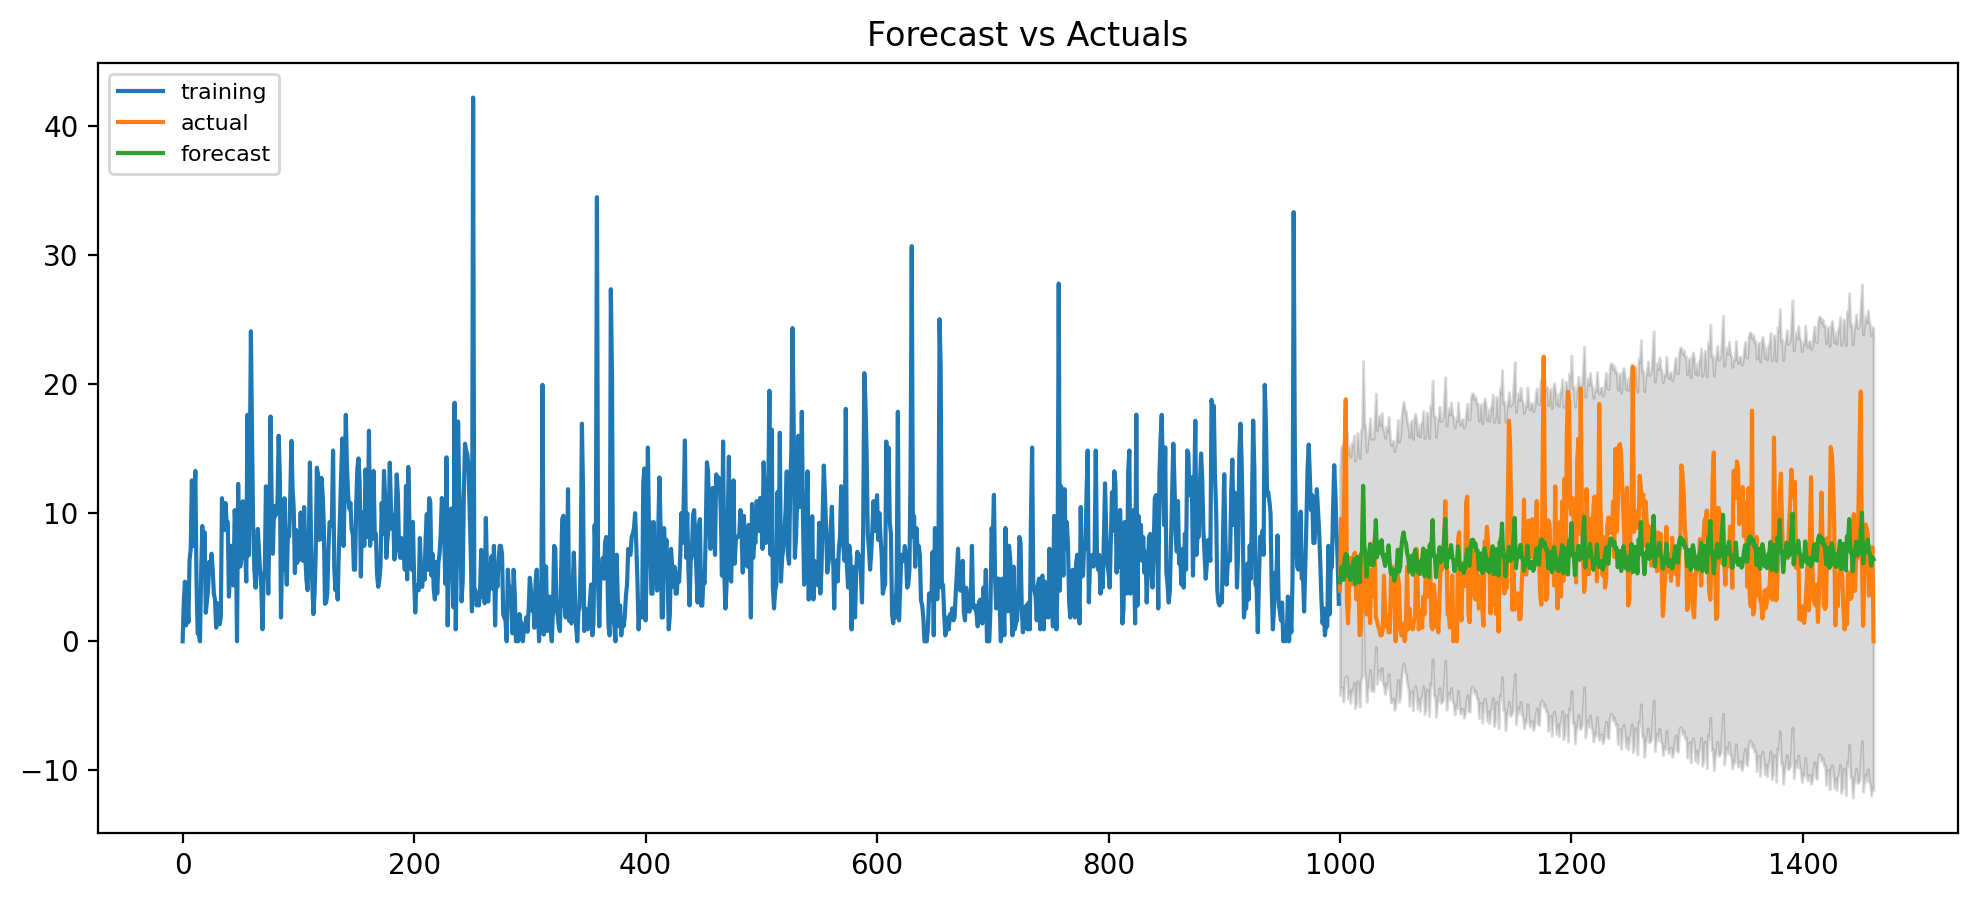

In [57]:
model = ARIMA(row[:training_time_steps], order=(1, 1, 1), seasonal_order=(1,1,1,60))
fitted = model.fit()

fc = fitted.get_forecast(len(row[training_time_steps:]))
conf = fc.conf_int(alpha=0.05) 

fc_series = pd.Series(fc.predicted_mean, index=row[training_time_steps:].index)
lower_series = pd.Series(conf.iloc[:, 0], index=row[training_time_steps:].index)
upper_series = pd.Series(conf.iloc[:, 1], index=row[training_time_steps:].index)


plt.figure(figsize=(12,5), dpi=200)
plt.plot(row[:training_time_steps], label='training')
plt.plot(row[training_time_steps:], label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()